In [125]:
import os
import pickle 
import sys
import random
import numpy as np
import matplotlib.pyplot as plt
import datetime
import math

In [144]:
def load_file(file):
    sys.path.append('D:/UCL/FSPSimulator')
    with open(os.path.join(os.getcwd(), f'../../src/data/catalogue/{file}.pickle'), 'rb') as f:
        # Load the data from the pickle file
        data = pickle.load(f)
        return data
    
def orbital_highway_plot(simName):
    sys.path.append('D:/UCL/FSPSimulator')
    with open(os.path.join(os.getcwd(), f'../../src/data/catalogue/{simName}.pickle'), 'rb') as f:
        # Load the data from the pickle file
        data = pickle.load(f)

        
    altitudes = [satellite.altitude for satellite in data]
    y_values = [random.random() for i in range(len(altitudes))]
    
    plt.scatter(altitudes, y_values, alpha=0.25, s=0.1)
    plt.xlim(0, 2000)
    plt.xlabel('Altitude (km)')
    plt.title(f'{simName}')
    plt.show()
    

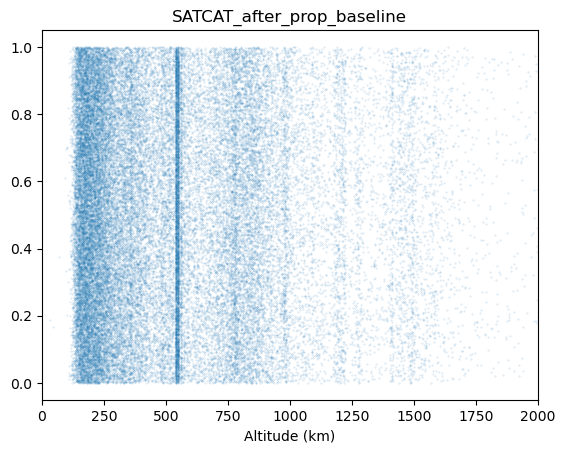

In [145]:
sim_name = 'SATCAT_after_prop_baseline'
orbital_highway_plot(sim_name)


In [135]:
SATCAT_after_prop = load_file('SATCAT_after_prop_baseline')
for satellite in SATCAT_after_prop:
    try: 
        satellite.altitude = np.linalg.norm(satellite.sgp4_ephemeris[0][1]) - 6378
        print(satellite.altitude)
    except:
        continue

np.shape(SATCAT_after_prop)

(54895,)

In [128]:
total = 0
for sat in SATCAT_after_prop:
    try:
        val = float(sat.mass)
        if val > 0:
            total += val
    except:
        continue

print(total)

49889197.92300162


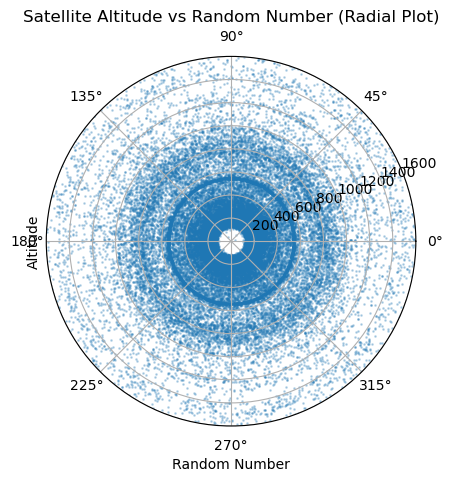

In [129]:
import matplotlib.pyplot as plt
import numpy as np
import random

# Sample data
y_values = [random.random() for _ in SATCAT_after_prop]
altitudes = [satellite.altitude for satellite in SATCAT_after_prop]

# Convert altitude and y values to polar coordinates
r = altitudes
theta = 2 * np.pi * np.array(y_values)

# Create a polar scatter plot
ax = plt.subplot(111, projection='polar')
ax.scatter(theta, r, s=1, alpha=0.25)

# Set the radial axis limit
ax.set_rlim(0, 1600)

# Add labels and title to the plot
ax.set_xlabel('Random Number')
ax.set_ylabel('Altitude')
ax.set_title('Satellite Altitude vs Random Number (Radial Plot)')

# Display the plot
plt.show()


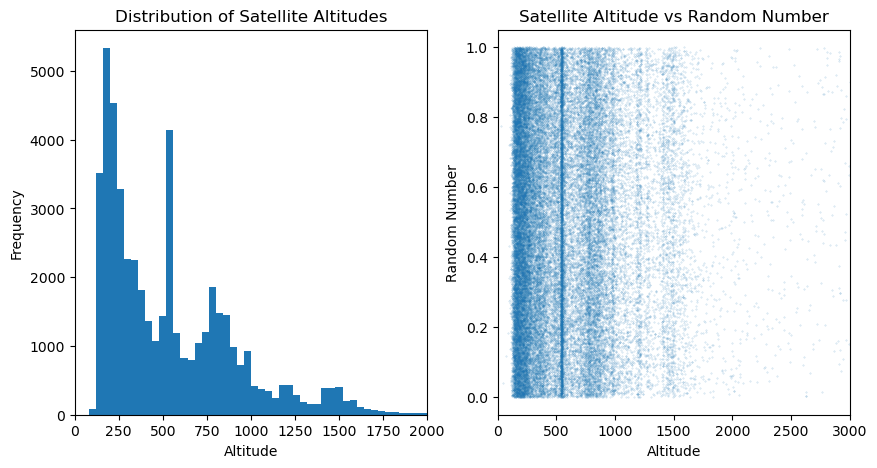

In [130]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
y_values = [random.random() for _ in SATCAT_after_prop]

altitudes = [satellite.altitude for satellite in SATCAT_after_prop]
# Create a histogram of the altitudes
ax1.hist(altitudes, bins=50, range=(0, 2000))

# Add labels and title to the plot
ax1.set_xlabel('Altitude')
ax1.set_ylabel('Frequency')
ax1.set_xlim(0, 2000)
ax1.set_title('Distribution of Satellite Altitudes')

# Plot the second chart on the second subplot
ax2.scatter(altitudes, y_values, s=0.1, alpha=0.3)

# Add labels and title to the plot
ax2.set_xlabel('Altitude')
ax2.set_ylabel('Random Number')
ax2.set_xlim(0, 3000)
ax2.set_title('Satellite Altitude vs Random Number')

# Display the plot
plt.show()

In [98]:
altitudes

[213.79832887352768,
 954.7662515570837,
 151.68012144097793,
 271.9298079666505,
 2853.7373819138993,
 2172.391089265275,
 21263.2285,
 755.8057779224328,
 20206.352,
 195.70219580763114,
 466.9170183929673,
 3198.9534434978814,
 556.5974329461178,
 237.0975,
 468.81626694467013,
 205.9189764392995,
 242.77032930418682,
 165.504,
 623.4568891363851,
 198.89891346738568,
 211.56902232366974,
 181.23079801989752,
 590.5252220151824,
 172.9021782002319,
 204.9472140532098,
 189.41572746738893,
 553.4974998967045,
 288.2622758170437,
 330.79070318332106,
 421.70323505605666,
 298.427889672741,
 400.93237956526264,
 166.3385,
 229.90534787892466,
 606.9734656287164,
 830.7078153881275,
 632.2775474966411,
 238.46013011749437,
 411.80138201239424,
 1566.3482176615844,
 1648.028519187952,
 816.3554449692192,
 1674.5248849597792,
 147.5902762613996,
 308.1699096283437,
 177.70480150814,
 310.72393671981354,
 1164.5036682895243,
 1042.9496797728598,
 167.3505,
 223.24261532903074,
 162.6465,
 

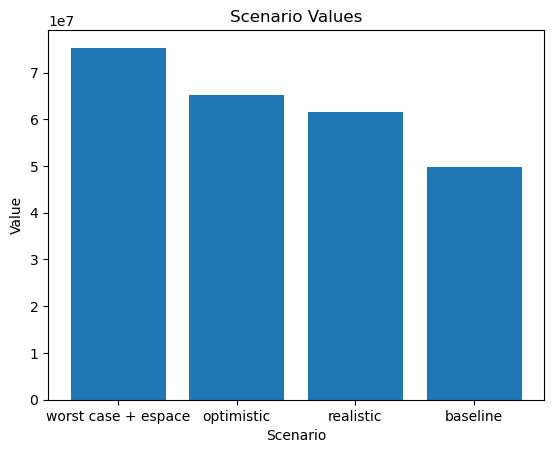

In [99]:
data = {"worst case + espace": 75305977.92300162, "optimistic": 65264154.92300162, "realistic": 61552853.92300162, "baseline": 49889197.92300162}

# Create a bar chart
plt.bar(data.keys(), data.values())

# Add labels and title to the plot
plt.xlabel('Scenario')
plt.ylabel('Value')
plt.title('Scenario Values')

# Display the plot
plt.show()

### Orbital Density

Firstly, calculate the volume of the entire orbital shell, and then the total volume of all space objects at one given time. 

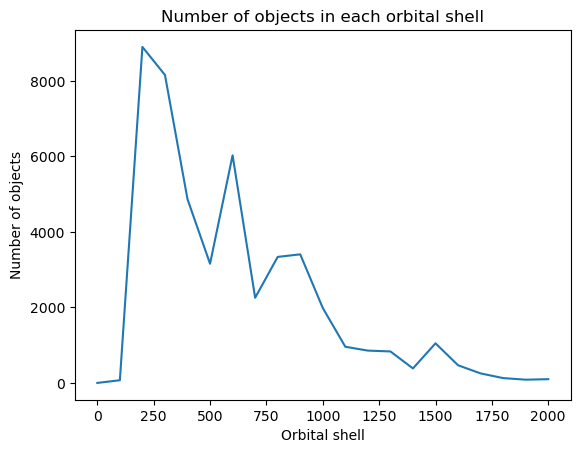

In [100]:
orbital_shells = {}
orbital_shells_volume = {}

for i in range(0, 2001, 100):
    # Add a key-value pair to the dictionary
    orbital_shells[i] = 0
    orbital_shells_volume[i] = 0

for obj in SATCAT_after_prop:
    altitude = obj.altitude
    shell = math.ceil(altitude / 100) * 100 # get the nearest 100km shell
    # increase the value in the dictionary by 1 where the shell and key are the same
    if shell in orbital_shells:
        orbital_shells[shell] += 1


x = list(orbital_shells.keys())
y = list(orbital_shells.values())

plt.plot(x, y)
plt.xlabel('Orbital shell')
plt.ylabel('Number of objects')
plt.title('Number of objects in each orbital shell')
plt.show()

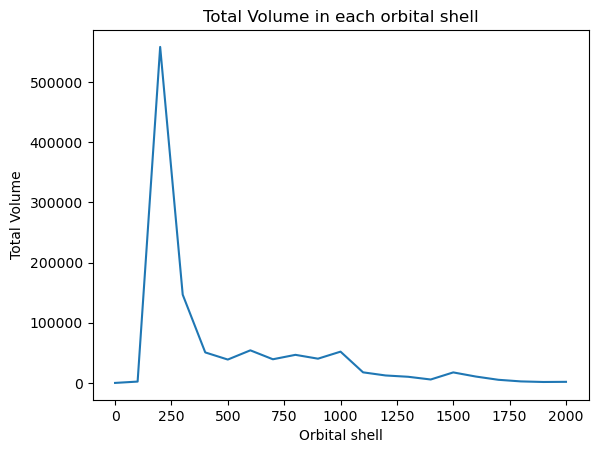

{0: 0,
 100: 2229.269999999999,
 200: 558058.9199999674,
 300: 146597.5800000364,
 400: 50658.95999999876,
 500: 38811.44999999926,
 600: 54120.20999999837,
 700: 39290.48999999944,
 800: 46645.529999999126,
 900: 40260.80999999912,
 1000: 51936.269999999546,
 1100: 17568.299999999766,
 1200: 12377.909999999803,
 1300: 10210.139999999836,
 1400: 5685.4799999999905,
 1500: 17468.879999999815,
 1600: 10597.679999999946,
 1700: 5203.169999999987,
 1800: 2518.2600000000066,
 1900: 1557.5999999999992,
 2000: 1810.4399999999976}

In [101]:
# calculate the mass in each orbital shell
for obj in SATCAT_after_prop:
    altitude = obj.altitude
    shell = math.ceil(altitude / 100) * 100 # get the nearest 100km shell
    # increase the value in the dictionary by 1 where the shell and key are the same
    if shell in orbital_shells_volume:
        orbital_shells_volume[shell] += obj.characteristic_area * obj.characteristic_length

x = list(orbital_shells_volume.keys())
y = list(orbital_shells_volume.values())

plt.plot(x, y)
plt.xlabel('Orbital shell')
plt.ylabel('Total Volume')
plt.title('Total Volume in each orbital shell')
plt.show()
orbital_shells_volume


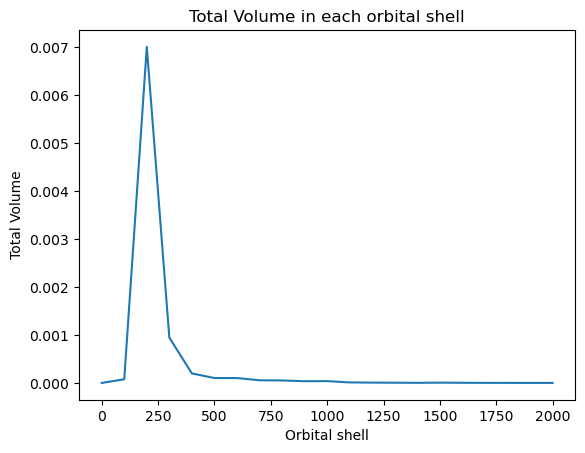

{0: 0,
 100: 2229.269999999999,
 200: 558058.9199999674,
 300: 146597.5800000364,
 400: 50658.95999999876,
 500: 38811.44999999926,
 600: 54120.20999999837,
 700: 39290.48999999944,
 800: 46645.529999999126,
 900: 40260.80999999912,
 1000: 51936.269999999546,
 1100: 17568.299999999766,
 1200: 12377.909999999803,
 1300: 10210.139999999836,
 1400: 5685.4799999999905,
 1500: 17468.879999999815,
 1600: 10597.679999999946,
 1700: 5203.169999999987,
 1800: 2518.2600000000066,
 1900: 1557.5999999999992,
 2000: 1810.4399999999976}

In [102]:
volumes = {}
for shell in orbital_shells_volume:
    r1 = shell
    r2 = shell + 100
    volume = (4/3) * math.pi * (r2**3 - r1**3)
    density = orbital_shells_volume[shell] / volume
    volumes[shell] = density

x = list(volumes.keys())
y = list(volumes.values())

plt.plot(x, y)
plt.xlabel('Orbital shell')
plt.ylabel('Total Volume')
plt.title('Total Volume in each orbital shell')
plt.show()
orbital_shells_volume

### Vis-Viva Law
The vis-viva equation is a formula that relates the velocity of a spacecraft in orbit around a celestial body to the distance between the spacecraft and the body, as well as the mass of the body.

In [131]:
total = 0
for obj in SATCAT_after_prop:
    # calcaulate the vis-viva equation
    gravity = 398600.4418
    v = math.sqrt(398600.4418 * obj.mass / (obj.altitude + 6378))

### Final Calculations and Comparisons to Other Models
Here in the results folder, is all of the previous models that have been run. This code here will compare and analyse each of their results. 

1. A 4x4 comparison plot of the orbital highways. 
2. A 4x4 comparison radio plot of the orbital highways.
3. A policy breakdown of the vis-visa law. 
4. A policy breakdown of the orbital spatial density.

In [156]:
import os
import pickle
import random
import matplotlib.pyplot as plt

def get_alitudes(simName):
    sys.path.append('D:/UCL/FSPSimulator')
    with open(os.path.join(os.getcwd(), f'../../src/data/catalogue/{simName}'), 'rb') as f:
        # Load the data from the pickle file
        data = pickle.load(f)
        
    altitudes = [satellite.altitude for satellite in data]
    y_values = [random.random() for i in range(len(altitudes))]
    output = zip(altitudes, y_values, simName)
    print(output)
    return output

# define the list of simNames
simNames = ['SATCAT_after_prop_optimistic.pickle', 'SATCAT_after_prop_realistic.pickle',
            'SATCAT_after_prop_worst_case1.pickle', 'SATCAT_after_prop_baseline.pickle']

all_altitudes = []
for simName in simNames:
    altitudes.append(get_alitudes(simName))

In [201]:
orbital_shells_vis_viva = []
orbital_shells_density = []


def get_alitudes(simName):
    sys.path.append('D:/UCL/FSPSimulator')
    with open(os.path.join(os.getcwd(), f'../../src/data/catalogue/{simName}'), 'rb') as f:
        # Load the data from the pickle file
        data = pickle.load(f)
        
    altitudes = [satellite.altitude for satellite in data]
    y_values = [random.random() for i in range(len(altitudes))]
    output = [altitudes, y_values]

    temp = {}
    density_temp = {}

    # also calculate the vis viva equation
    for i in range(0, 2001, 100):
        # Add a key-value pair to the dictionaries
        temp[i] = 0
    for obj in data:
        shell = math.ceil(obj.altitude / 100) * 100 # get the nearest 100km shell
        
        # increase the value in the dictionary by 1 where the shell and key are the same
        if shell in orbital_shells:            
            # calculate vis viva and add to the value in the dictionary
            gravity = 398600.4418
            if math.isnan(obj.mass):
                vis_viva = math.sqrt(gravity * 12 / (obj.altitude + 6378))
            else:
                vis_viva = math.sqrt(gravity * obj.mass / (obj.altitude + 6378))
            temp[shell] += vis_viva
    
    # then based on the temp shells, calculate the total spatial density
    for shell in temp:
        r1 = shell
        r2 = shell + 100
        volume = (4/3) * math.pi * (r2**3 - r1**3)
        density = temp[shell] / volume
        density_temp[shell] = density
    
    orbital_shells_vis_viva.append(temp)
    orbital_shells_density.append(density_temp)

    return output

# define the list of simNames
simNames = ['SATCAT_after_prop_baseline.pickle', 'SATCAT_after_prop_realistic.pickle',
            'SATCAT_after_prop_optimistic.pickle', 'SATCAT_after_prop_worst_case1.pickle']

all_altitudes = []
for simName in simNames:
    all_altitudes.append(get_alitudes(simName))

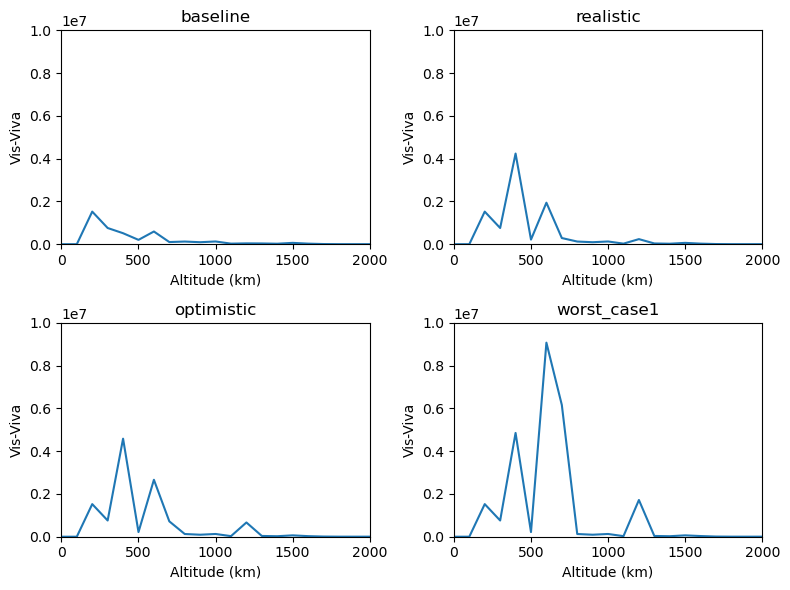

In [197]:
# Create a 2 x 2 plot
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(8, 6))

# Loop through the list of dictionaries and plot a line graph for each
for i in range(len(orbital_shells_vis_viva)):
    x = list(orbital_shells_vis_viva[i].keys())
    y = list(orbital_shells_vis_viva[i].values())
    axs[i // 2, i % 2].plot(x, y)
    axs[i // 2, i % 2].set_title(f'{simNames[i].replace(".pickle", "").replace("SATCAT_after_prop_", "")}')
    axs[i // 2, i % 2].set_xlabel('Altitude (km)')
    axs[i // 2, i % 2].set_ylabel('Vis-Viva')
    axs[i // 2, i % 2].set_xlim(0, 2000)
    axs[i // 2, i % 2].set_ylim(0, 10000000)

# Adjust the layout and show the plot
plt.tight_layout()
plt.show()

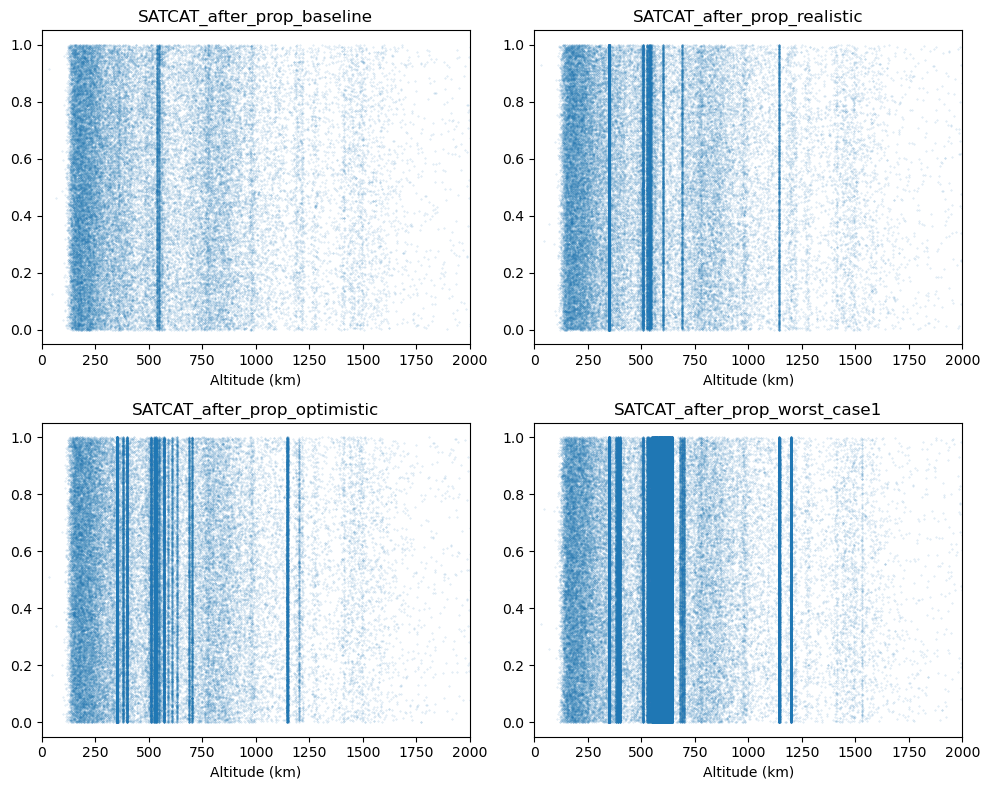

In [184]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
for i in range(2):
    for j in range(2):
        idx = 2*i+j
        x, y = all_altitudes[idx][0], all_altitudes[idx][1]
        axs[i, j].scatter(x, y, alpha=0.25, s=0.1)
        axs[i, j].set_xlim(0, 2000)
        axs[i, j].set_xlabel('Altitude (km)')
        axs[i, j].set_title(simNames[idx].replace('.pickle', ''))

plt.tight_layout()
plt.show()

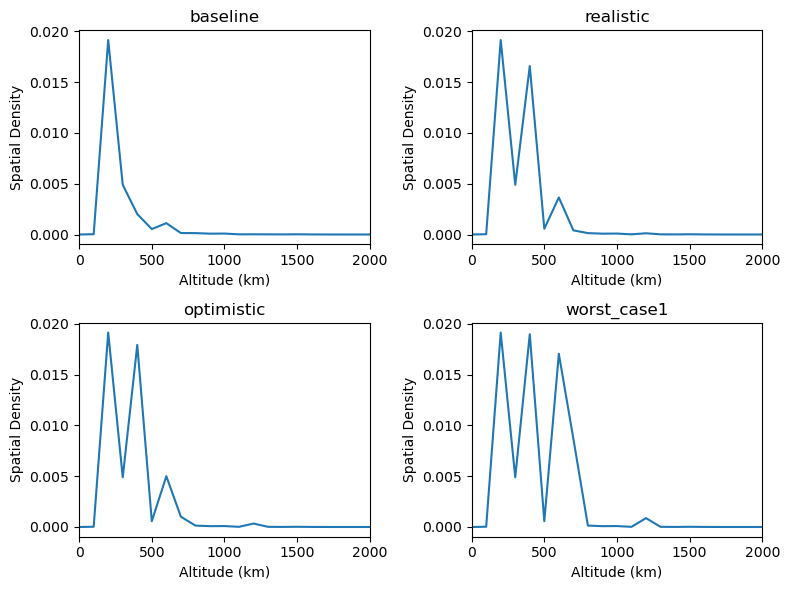

In [208]:
# Create a 2 x 2 plot
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(8, 6))

# Loop through the list of dictionaries and plot a line graph for each
for i in range(len(orbital_shells_density)):
    x = list(orbital_shells_density[i].keys())
    y = list(orbital_shells_density[i].values())
    axs[i // 2, i % 2].plot(x, y)
    axs[i // 2, i % 2].set_title(f'{simNames[i].replace(".pickle", "").replace("SATCAT_after_prop_", "")}')
    axs[i // 2, i % 2].set_xlabel('Altitude (km)')
    axs[i // 2, i % 2].set_ylabel('Spatial Density')
    axs[i // 2, i % 2].set_xlim(0, 2000)

# Adjust the layout and show the plot
plt.tight_layout()
plt.show()

In [203]:
orbital_shells_density

[{0: 0.0,
  100: 2.7219327353193013e-05,
  200: 0.01915276512411517,
  300: 0.0048934855598762326,
  400: 0.0020134058652614907,
  500: 0.0005349956390343486,
  600: 0.0011174136576260739,
  700: 0.0001432842438201435,
  800: 0.00013751249504864382,
  900: 8.260718486717799e-05,
  1000: 9.241463256598783e-05,
  1100: 1.645526357143421e-05,
  1200: 2.013031929064189e-05,
  1300: 1.5582797879895997e-05,
  1400: 8.830873371079733e-06,
  1500: 2.1010953122769556e-05,
  1600: 7.902091339673931e-06,
  1700: 2.1391167840737028e-06,
  1800: 6.985978789613062e-07,
  1900: 4.505817351434222e-07,
  2000: 4.867745655558495e-07},
 {0: 0.0,
  100: 2.7219327353193013e-05,
  200: 0.01915276512411517,
  300: 0.0048934855598762326,
  400: 0.016591645552969894,
  500: 0.0005671596553957059,
  600: 0.0036495154660075805,
  700: 0.00040861507541379606,
  800: 0.00013751249504864382,
  900: 8.260718486717799e-05,
  1000: 9.241463256598783e-05,
  1100: 1.645526357143421e-05,
  1200: 0.00012136414451325306,
 